<a href="https://colab.research.google.com/github/K-J-HYEON/good/blob/add-input-method/22_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

## colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다.
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip


Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 8s 12ms/step - loss: 0.7189 - accuracy: 0.4374 - val_loss: 0.6916 - val_accuracy: 0.4800


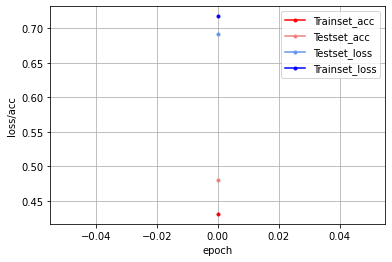

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)


# 데이터의 수를 늘려주는 ImageDataGenerator()함수와 
# 폴더에 저장된 데이터를 불러오는 flow_from_directory()를 사용한다.
train_datagen = ImageDataGenerator(rescale=1./255, #ImageDataGenerator() 함수는 주어진 데이터를 이용해 번형된 이미지를 만들어 학습셋에 포함시키는 편리한 기능 제공
                                #    (이미지의 데이터 수를 확장할 때 효과적으로 사용할 수 있다.) 
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다. #
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

# horizontal_flip, vertical_flip: 주어진 이미지를 수평 또는 수직으로 뒤집는다.
# rescale : 주어진 이미지의 크기를 바꾸어 준다. ex)원본 영상이 0 ~ 255의 RGB 값을 가지고 있으므로 255로 나누면 0~1의 값으로 변환되어 학습이 좀더 빠르고 쉬워짐
# zoom_range : 정해진 범위 안에서 축소 또는 확대
# ~~나머지는 p.308 참고

train_generator = train_datagen.flow_from_directory(
       './train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150), # 이미지가 위치한 폴더 위치
       batch_size=5, # 이미지 크기
       class_mode='binary') # 치매/정상 2진 분류이므로 바이너리 모드로 실행

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       './test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다
history = model.fit_generator( #fit이 아닌 fit_generator을 사용했다.
       train_generator, # 앞서 만들어진train_generator를 학습 모델로 사용
       steps_per_epoch=100, # 이미지 생성기에서 몇 개의 샘플을 뽑을지 결정
       epochs=20,
       validation_data=test_generator, #앞서 만들어진 test_generator를 테스트셋으로 사용
       validation_steps=10) #=> 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 총 100개의 검증 샘플이 있고 배치사이즈가 5이므로 10 스텝으로 지정합니다. ?

#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

# #결과를 그래프로 표현하는 부분입니다.
# acc= history.history['accuracy']
# val_acc= history.history['val_accuracy']
# y_vloss = history.history['val_loss']
# y_loss = history.history['loss']

# x_len = np.arange(len(y_loss))  
# plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
# plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
# plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
# plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# plt.legend(loc='upper right') 
# plt.grid()
# plt.xlabel('epoch')
# plt.ylabel('loss/acc')
# plt.show()


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 1s 35ms/step - loss: 0.7172 - accuracy: 0.5443 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 2/50
30/30 [==============================] - 1s 30ms/step - loss: 0.6986 - accuracy: 0.4708 - val_loss: 0.6811 - val_accuracy: 0.5600
Epoch 3/50
30/30 [==============================] - 1s 31ms/step - loss: 0.7014 - accuracy: 0.5057 - val_loss: 0.6961 - val_accuracy: 0.4600
Epoch 4/50
30/30 [==============================] - 1s 30ms/step - loss: 0.6862 - accuracy: 0.5713 - val_loss: 0.6857 - val_accuracy: 0.4800
Epoch 5/50
30/30 [==============================] - 1s 30ms/step - loss: 0.6824 - accuracy: 0.5763 - val_loss: 0.6746 - val_accuracy: 0.7000
Epoch 6/50
30/30 [==============================] - 1s 30ms/step - loss: 0.6857 - accuracy: 0.5701 - val_loss: 0.6636 - val_accuracy: 0.5800
Epoch 7/50
30/30 [==============================] - 1s 30ms/step - loss: 0.6543 - accuracy: 0.6156 - val_loss: 0.6303 - val_accuracy: 0.6600
Epoch 8/50
30

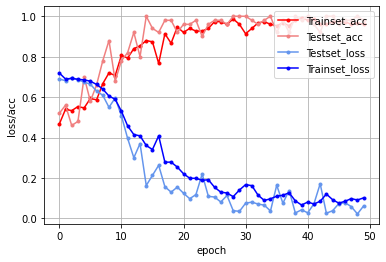

'\n12:52\n'

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics
np.random.seed(3)
tf.random.set_seed(3)
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 10%범위에서 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 
train_generator = train_datagen.flow_from_directory(
       'train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')
#테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  
test_generator = test_datagen.flow_from_directory(
       'test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
#모델을 실행합니다(학습)
history = model.fit_generator(
       train_generator,     # 학습하니깐 train data 사용 
       steps_per_epoch=30,  #적절한 값으로 조절합니다.
       epochs=50,           #적절한 값으로 조절합니다.
       validation_data=test_generator,
       validation_steps=10)



#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

'''
12:52
'''